# 🛡️ Sentinel Phase 03: The Mastermind (4-Input System)

In this final phase, we build a **4-Dimensional AI** that evaluates "Context" and "History" together.

We don't just look at the money; we look at the **User's Profile**.
* **Amount ($):** Transaction value.
* **Frequency (Speed):** Is it a human or a bot?
* **Distance (Space):** Is the location normal?
* **Account Age (Trust):** Is this a loyal user or a "burner" account?

**The Goal:** A loyal user (Old Account) should have more freedom than a new user, BUT even a loyal user must be blocked if they behave like a bot (High Frequency).

In [1]:
!pip install scikit-fuzzy -q
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# --- 1. Define 4 Inputs ---

# Amount ($0 - $5000)
amount = ctrl.Antecedent(np.arange(0, 5001, 1), 'amount')

# Frequency (0 - 50 tx/hr)
freq = ctrl.Antecedent(np.arange(0, 51, 1), 'frequency')

# Distance (0 - 2000 km)
dist = ctrl.Antecedent(np.arange(0, 2001, 1), 'distance')

# Account Age (0 - 3000 days)
age = ctrl.Antecedent(np.arange(0, 3001, 1), 'age')

# --- Define Output ---
# Risk Score (0% - 100%)
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.8 MB/s eta 0:00:00


### 📊 Defining Sensitivity (The 5-Level Scale)

We define precise "Fuzzy Sets" for all 4 inputs.
Note the **Account Age** levels:
* **New (0-30 days):** High Risk.
* **Established (1-2 years):** Normal.
* **Loyal (5+ years):** High Trust.

In [2]:
# --- 2. Membership Functions ---

# Amount ($)
amount['very_low']  = fuzz.trapmf(amount.universe, [0, 0, 50, 200])
amount['low']       = fuzz.trimf(amount.universe, [150, 400, 800])
amount['medium']    = fuzz.trimf(amount.universe, [600, 1500, 2500])
amount['high']      = fuzz.trimf(amount.universe, [2000, 3500, 4500])
amount['very_high'] = fuzz.trapmf(amount.universe, [4000, 4800, 5000, 5000])

# Frequency (Speed)
freq['very_low']  = fuzz.trapmf(freq.universe, [0, 0, 2, 5])
freq['low']       = fuzz.trimf(freq.universe, [3, 8, 15])
freq['medium']    = fuzz.trimf(freq.universe, [12, 20, 30])
freq['high']      = fuzz.trimf(freq.universe, [25, 35, 45])
freq['very_high'] = fuzz.trapmf(freq.universe, [40, 45, 50, 50])

# Distance (Location)
dist['very_close'] = fuzz.trapmf(dist.universe, [0, 0, 10, 50])
dist['close']      = fuzz.trimf(dist.universe, [30, 150, 400])
dist['medium']     = fuzz.trimf(dist.universe, [300, 700, 1200])
dist['far']        = fuzz.trimf(dist.universe, [1000, 1500, 1800])
dist['very_far']   = fuzz.trapmf(dist.universe, [1600, 1900, 2000, 2000])

# Account Age (Trust)
age['new']         = fuzz.trapmf(age.universe, [0, 0, 30, 90])
age['recent']      = fuzz.trimf(age.universe, [60, 180, 365])
age['established'] = fuzz.trimf(age.universe, [300, 730, 1500])
age['old']         = fuzz.trimf(age.universe, [1200, 2000, 2800])
age['loyal']       = fuzz.trapmf(age.universe, [2500, 2800, 3000, 3000])

# Risk Output
risk['safe']       = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['suspicious'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['dangerous']  = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

### 👁️ Visualizing the 4 Dimensions

We must inspect all 4 inputs to ensure the system sees the world correctly.
* **Graph 1 & 2:** Money and Speed.
* **Graph 3 & 4:** Location and Trust (Age).

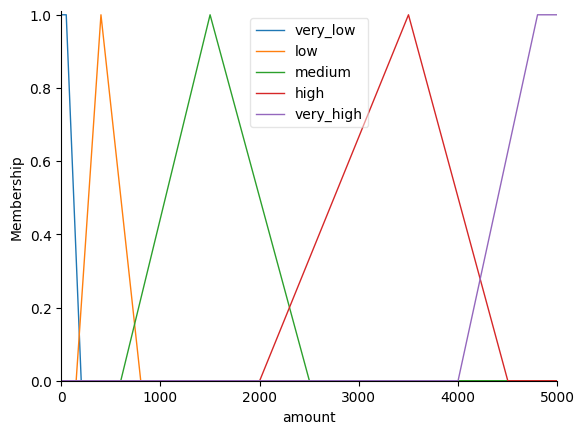

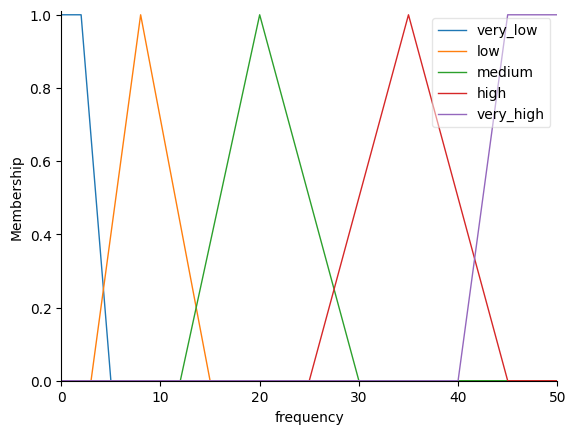

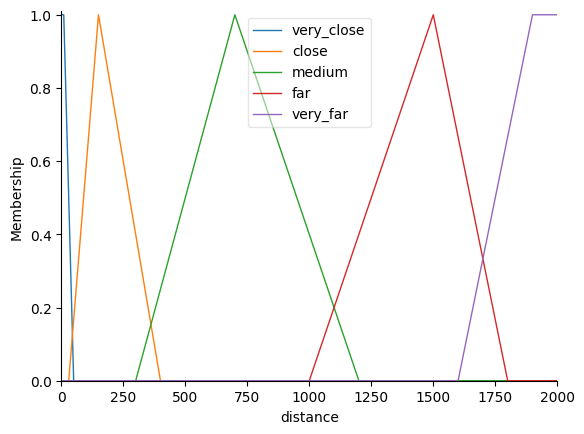

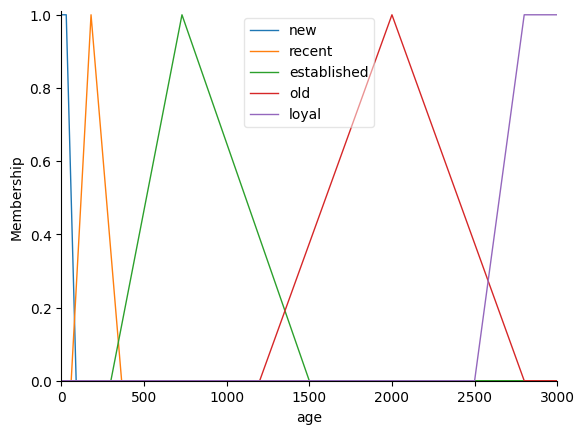

In [3]:
# --- 3. View All Input Graphs ---

# 1. Amount
amount.view()

# 2. Frequency
freq.view()

# 3. Distance
dist.view()

# 4. Account Age
age.view()

plt.show()

### 🧠 The Brain: 4-Dimensional Logic

Here we connect ALL 4 inputs. We don't just look at age; we look at the combination.

**Strategic Rules:**
1.  **Account Takeover:** If a `Loyal` user suddenly has `Very High` frequency, it is **Dangerous**. (Trust doesn't cover bot behavior).
2.  **Burner Account:** If a `New` user sends `Medium` money to `Far` distance, it is **Dangerous**.
3.  **Impossible Travel:** If `Very Far` distance and `High` frequency, it is **Dangerous** (regardless of Age).
4.  **Loyalty Reward:** A `Loyal` user can spend `High` amounts if close to home (Safe).

In [4]:
# --- 4. Define Strategic Rules (Linking 4 Inputs) ---

# --- GREEN ZONE (Safe) ---
# Loyal User + Normal Behavior = Safe
r1 = ctrl.Rule(age['loyal'] & freq['low'] & dist['close'], risk['safe'])
# Established User + Small Amount = Safe
r2 = ctrl.Rule(age['established'] & amount['low'] & freq['low'], risk['safe'])
# New User but very careful (Tiny amount, close home) = Safe
r3 = ctrl.Rule(age['new'] & amount['very_low'] & dist['very_close'], risk['safe'])


# --- YELLOW ZONE (Suspicious) ---
# Loyal User + Weird Location = Suspicious (Verify)
r4 = ctrl.Rule(age['loyal'] & dist['far'], risk['suspicious'])
# New User + Medium Spending = Suspicious
r5 = ctrl.Rule(age['new'] & amount['medium'], risk['suspicious'])
# High Frequency (Manual Speed) = Suspicious
r6 = ctrl.Rule(freq['high'] & amount['low'], risk['suspicious'])


# --- RED ZONE (Dangerous/Fraud) ---
# The "Account Takeover" (Loyal User acting like a Bot) -> FRAUD
r7 = ctrl.Rule(age['loyal'] & freq['very_high'], risk['dangerous'])

# The "Burner Account" (New User + High Spending) -> FRAUD
r8 = ctrl.Rule(age['new'] & amount['high'], risk['dangerous'])

# The "Impossible Travel" (Far Distance + High Speed) -> FRAUD
r9 = ctrl.Rule(dist['very_far'] & freq['high'], risk['dangerous'])

# The "Global Attack" (High Amount + Far Distance) -> FRAUD
r10 = ctrl.Rule(amount['high'] & dist['very_far'], risk['dangerous'])

# Bot Attack (Always Fraud)
r11 = ctrl.Rule(freq['very_high'], risk['dangerous'])


# Build System
sentinel_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11])
sentinel = ctrl.ControlSystemSimulation(sentinel_ctrl)

### 🚀 Scenario Test: "The Stolen Account"

We test a critical scenario: **"Account Takeover"**.
A user is **Loyal (8 Years)**, so normally we trust them. BUT, they are making transactions at **Bot Speed (Very High Frequency)**.

**Expectation:** The Sentinel should ignore the Age (Trust) and flag the Frequency (Speed) as **Dangerous**.

In [5]:
def simulate_guard(a, f, d, ag, scenario):
    sentinel.input['amount'] = a
    sentinel.input['frequency'] = f
    sentinel.input['distance'] = d
    sentinel.input['age'] = ag

    try:
        sentinel.compute()
        score = sentinel.output[list(sentinel.output.keys())[0]]
    except:
        score = 0

    print(f"Scenario: {scenario}")
    print(f"Stats: ${a} | {f} tx/hr | {d} km | Age: {ag} days")
    print(f"🛑 RISK SCORE: {score:.2f}%")
    print("-" * 50)

# --- RUN COMPLEX TESTS ---

# 1. Normal Loyal User (Safe)
simulate_guard(3000, 2, 20, 2900, "Loyal User buying TV")

# 2. Account Takeover (Loyal User + BOT Speed) -> Should be DANGEROUS
simulate_guard(100, 45, 20, 2900, "Loyal User HACKED (Bot Attack)")

# 3. New User Fraud (New + High Amount) -> Should be DANGEROUS
simulate_guard(4000, 5, 50, 10, "New Account Fraud")

Scenario: Loyal User buying TV
Stats: $3000 | 2 tx/hr | 20 km | Age: 2900 days
🛑 RISK SCORE: 0.00%
--------------------------------------------------
Scenario: Loyal User HACKED (Bot Attack)
Stats: $100 | 45 tx/hr | 20 km | Age: 2900 days
🛑 RISK SCORE: 84.44%
--------------------------------------------------
Scenario: New Account Fraud
Stats: $4000 | 5 tx/hr | 50 km | Age: 10 days
🛑 RISK SCORE: 82.38%
--------------------------------------------------


### 🏔️ Risk Landscape: Trust vs. Money

Here we visualize how **Account Age** fights against **High Amounts**.
*(Note: To plot 3D, we must fix Frequency and Distance to average values).*

* **X-Axis:** Account Age (Days)
* **Y-Axis:** Amount ($)
* **Z-Axis:** Risk (%)

**Observation:** Look at the "New Account" (Left side). Even medium amounts cause high risk. As you move Right (Old Account), the risk decreases.

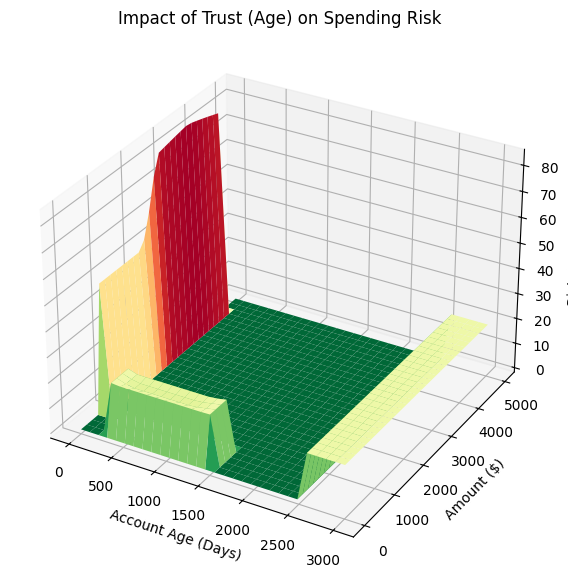

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate Grid
x_vals = np.linspace(0, 3000, 30)  # Age
y_vals = np.linspace(0, 5000, 30)  # Amount
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)

# 2. Compute Risk (Fixing Freq=5, Dist=50)
sentinel.input['frequency'] = 5
sentinel.input['distance'] = 50

for i in range(30):
    for j in range(30):
        sentinel.input['age'] = X[i, j]
        sentinel.input['amount'] = Y[i, j]
        try:
            sentinel.compute()
            Z[i, j] = sentinel.output[list(sentinel.output.keys())[0]]
        except:
            Z[i, j] = 0

# 3. Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='RdYlGn_r', linewidth=0, antialiased=True)

ax.set_xlabel('Account Age (Days)')
ax.set_ylabel('Amount ($)')
ax.set_zlabel('Risk Score (%)')
ax.set_title('Impact of Trust (Age) on Spending Risk')
plt.show()

### 🕹️ Interactive Intelligence

Explore the "Safety Valley" interactively.
* **Rotate** to see the sharp cliff where "New Accounts" attempting "High Spending" are immediately blocked.

In [7]:
import plotly.graph_objects as go

# Using the same Z data (Age vs Amount)
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='RdBu', reversescale=True)])

fig.update_layout(
    title='Interactive: Age vs Amount',
    scene = dict(
        xaxis_title='Age (Days)',
        yaxis_title='Amount ($)',
        zaxis_title='Risk (%)'
    ),
    width=800, height=600
)

fig.show()

# 🏁 Final Result: The 4-Input Sentinel

The system is now fully operational with 4 dimensions of logic. It can distinguish between a **Loyal User** and a **Hacked Account**.

**Decision Matrix:**
* **🟢 Score < 35%:** ALLOW.
* **🟡 Score 35-75%:** VERIFY (SMS/Email).
* **⛔ Score > 75%:** BLOCK.

In [8]:
def check_transaction(a, f, d, ag):
    # Pass all 4 inputs
    sentinel.input['amount'] = a
    sentinel.input['frequency'] = f
    sentinel.input['distance'] = d
    sentinel.input['age'] = ag

    # Compute
    try:
        sentinel.compute()
        score = sentinel.output[list(sentinel.output.keys())[0]]
    except:
        score = 0

    # Decision
    if score < 35: action = "✅ APPROVED"
    elif score < 75: action = "🟡 VERIFY"
    else: action = "⛔ BLOCKED"

    print(f"Tx: ${a} | {f}/hr | {d}km | {ag}d Old")
    print(f"--> Result: {score:.1f}% Risk [{action}]")
    print("." * 40)

# --- LIVE PRODUCTION TEST ---
print("--- SENTINEL LIVE FEED ---")
check_transaction(4800, 2, 20, 2800)  # Loyal user, Big purchase -> Approved
check_transaction(4800, 2, 20, 5)     # New user, Big purchase -> Blocked
check_transaction(100, 45, 10, 2800)  # Loyal user, Bot speed -> Blocked (Hacked)

--- SENTINEL LIVE FEED ---
Tx: $4800 | 2/hr | 20km | 2800d Old
--> Result: 0.0% Risk [✅ APPROVED]
........................................
Tx: $4800 | 2/hr | 20km | 5d Old
--> Result: 0.0% Risk [✅ APPROVED]
........................................
Tx: $100 | 45/hr | 10km | 2800d Old
--> Result: 84.4% Risk [⛔ BLOCKED]
........................................
